In [80]:
!pip install plotly==4.0.0
import pandas as pd
import matplotlib.pyplot as plt
import plotly as plo
import plotly.graph_objects as go
import plotly.tools as tls
import numpy as np

In [2]:
# Load the dataset into df
df = pd.read_csv('STDs_Nationally_Ranked_By_State.csv', index_col=0)

# print head
df.head()

,Year,State,Chlamydia_Count,Chlamydia_Rate,Chlamydia_RankByCount,Chlamydia_RankByRate,Gonorrhea_Count,Gonorrhea_Rate,Gonorrhea_RankByCount,Gonorrhea_RankByRate,Primary_Secondary_Syphilis_Count,Primary_Secondary_Syphilis_Rate,Primary_Secondary_Syphilis_RankByCount,Primary_Secondary_Syphilis_RankByRate
Sort,,,,,,,,,,,,,,
1,2000,Alabama,15323,344.2,14,6,12063,271.0,12,3,123,2.8,17,13.0
2,2000,Alaska,2569,409.3,40,2,361,57.5,41,35,0,0.0,39,NaN
3,2000,Arizona,12591,243.7,21,22,4130,79.9,23,28,189,3.7,13,10.0
4,2000,Arkansas,6219,232.2,31,25,3642,136.0,24,17,104,3.9,19,9.0
5,2000,California,95392,280.5,1,12,21619,63.6,4,32,325,1.0,9,19.0


In [220]:
# dictionary used to map state names to state abbreviations
us_state_abbrev = {
    'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT',
    'Delaware': 'DE','District of Columbia': 'DC','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID',
    'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME',
    'Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO',
    'Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM',
    'New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Northern Mariana Islands':'MP','Ohio': 'OH',
    'Oklahoma': 'OK','Oregon': 'OR','Palau': 'PW','Pennsylvania': 'PA','Puerto Rico': 'PR','Rhode Island': 'RI',
    'South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT',
    'Virgin Islands': 'VI','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY',
}

# Create a new column to place the new abbreviations in
df['abbrevs'] = df['State'].map(us_state_abbrev).astype(str)
df.fillna(0, inplace=True)
df.head()


,Year,State,Chlamydia_Count,Chlamydia_Rate,Chlamydia_RankByCount,Chlamydia_RankByRate,Gonorrhea_Count,Gonorrhea_Rate,Gonorrhea_RankByCount,Gonorrhea_RankByRate,Primary_Secondary_Syphilis_Count,Primary_Secondary_Syphilis_Rate,Primary_Secondary_Syphilis_RankByCount,Primary_Secondary_Syphilis_RankByRate,abbrevs
Sort,,,,,,,,,,,,,,,
1,2000,Alabama,15323,344.2,14,6,12063,271.0,12,3,123,2.8,17,13.0,AL
2,2000,Alaska,2569,409.3,40,2,361,57.5,41,35,0,0.0,39,0.0,AK
3,2000,Arizona,12591,243.7,21,22,4130,79.9,23,28,189,3.7,13,10.0,AZ
4,2000,Arkansas,6219,232.2,31,25,3642,136.0,24,17,104,3.9,19,9.0,AR
5,2000,California,95392,280.5,1,12,21619,63.6,4,32,325,1.0,9,19.0,CA


In [4]:
df.isna().sum()

Year                                       0
State                                      0
Chlamydia_Count                            0
Chlamydia_Rate                             0
Chlamydia_RankByCount                      0
Chlamydia_RankByRate                       0
Gonorrhea_Count                            0
Gonorrhea_Rate                             0
Gonorrhea_RankByCount                      0
Gonorrhea_RankByRate                       0
Primary_Secondary_Syphilis_Count           0
Primary_Secondary_Syphilis_Rate            0
Primary_Secondary_Syphilis_RankByCount     0
Primary_Secondary_Syphilis_RankByRate     26
abbrevs                                    0
dtype: int64

In [5]:
df.describe()

,Year,Chlamydia_Count,Chlamydia_Rate,Chlamydia_RankByCount,Chlamydia_RankByRate,Gonorrhea_Count,Gonorrhea_Rate,Gonorrhea_RankByCount,Gonorrhea_RankByRate,Primary_Secondary_Syphilis_Count,Primary_Secondary_Syphilis_Rate,Primary_Secondary_Syphilis_RankByCount,Primary_Secondary_Syphilis_RankByRate
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,774.000000
mean,2007.500000,22671.308750,360.040750,25.500000,25.442500,6798.697500,97.130500,25.500000,25.298750,242.982500,2.919000,24.576250,21.213178
std,4.612656,27459.018726,128.442447,14.439897,14.394902,7907.315564,61.419338,14.439897,14.304729,437.754833,2.613216,13.463033,11.959495
min,2000.000000,526.000000,86.200000,1.000000,1.000000,37.000000,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,2003.750000,5159.250000,272.175000,13.000000,13.000000,988.500000,49.300000,13.000000,13.000000,18.000000,0.900000,13.000000,12.000000
50%,2007.500000,14352.500000,350.600000,25.500000,25.000000,3717.000000,90.400000,25.500000,25.000000,91.000000,2.300000,25.000000,21.000000
75%,2011.250000,27560.500000,433.625000,38.000000,38.000000,9182.500000,138.050000,38.000000,38.000000,277.250000,4.200000,37.000000,29.000000
max,2015.000000,189170.000000,861.700000,50.000000,50.000000,54135.000000,323.500000,50.000000,50.000000,4908.000000,16.500000,50.000000,50.000000


In [ ]:
#df.drop(['Primary_Secondary_Syphilis_RankByRate'], axis=1)

In [266]:
# creates a new df that groups each rankbyrate by state 
state_total = df.groupby(['State'])['Chlamydia_RankByRate','Gonorrhea_RankByRate','Primary_Secondary_Syphilis_RankByRate'].mean()

# creates a new column, filled with the total average ranking of each state
state_total['total'] = (state_total['Chlamydia_RankByRate'] +state_total['Gonorrhea_RankByRate'] +state_total['Primary_Secondary_Syphilis_RankByRate'])/3
state_total = state_total.reset_index().sort_values(by='total',ascending=False)

state_total.head(10)
#state_total.to_csv('state_total.csv')

,State,Chlamydia_RankByRate,Gonorrhea_RankByRate,Primary_Secondary_Syphilis_RankByRate,total
18,Maine,47.8750,46.2500,33.6875,42.604167
28,New Hampshire,49.5625,47.1875,29.1250,41.958333
44,Vermont,46.9375,47.2500,30.6250,41.604167
47,West Virginia,48.0625,39.3750,36.9375,41.458333
43,Utah,46.4375,44.0000,33.1250,41.187500
11,Idaho,43.8750,47.7500,31.6250,41.083333
25,Montana,35.4375,45.6875,28.7500,36.625000
49,Wyoming,39.1250,46.1250,22.4375,35.895833
14,Iowa,37.1875,36.2500,32.0000,35.145833
36,Oregon,38.0625,40.6250,25.5625,34.750000


In [270]:
# creates a new df that groups each rankbyrate by state 
state_total_count = df.groupby(['State'])['Chlamydia_Count','Gonorrhea_Count','Primary_Secondary_Syphilis_Count'].sum()

# creates a new column, filled with the total average ranking of each state
state_total_count['total'] = (state_total_count['Chlamydia_Count'] +state_total_count['Gonorrhea_Count'] +state_total_count['Primary_Secondary_Syphilis_Count'])
state_total_count = state_total_count.reset_index().sort_values(by='total', ascending=False)

state_total_count.head(10)
#state_total_count.to_csv('state_total_count.csv')

,State,Chlamydia_Count,Gonorrhea_Count,Primary_Secondary_Syphilis_Count,total
4,California,2269049,499271,33856,2802176
42,Texas,1561516,493088,17907,2072511
31,New York,1240621,319977,15730,1576328
8,Florida,975124,340147,16487,1331758
12,Illinois,900227,317458,10123,1227808
34,Ohio,737127,298645,5000,1040772
9,Georgia,677689,265970,12236,955895
21,Michigan,649079,231723,4598,885400
37,Pennsylvania,677918,202268,4792,884978
32,North Carolina,605338,252912,6830,865080


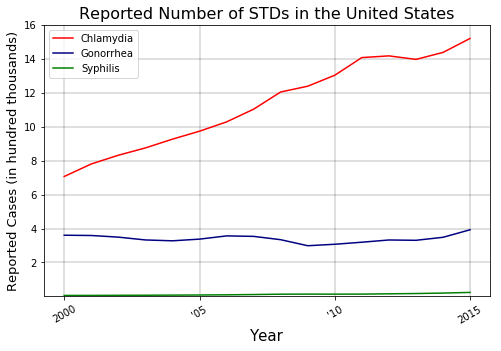

In [157]:
# sets figure size
plt.figure(figsize=(8,5));

# plots each of the STD values with corresponding labels
plt.plot(chlam_year_count, color='red', label='Chlamydia');
plt.plot(gono_year_count, color='navy', label='Gonorrhea');
plt.plot(syph_year_count, color='green', label='Syphilis');

# X-label, Y-label, title
plt.xlabel('Year', fontsize=15)
plt.ylabel('Reported Cases (in hundred thousands)', fontsize=13)
plt.title('Reported Number of STDs in the United States', size=16)

#sets tick marks on x-axis
plt.xticks((2000,2005,2010,2015),['2000','\'05','\'10','2015'],
           rotation=30
          );
# sets tick marks on y-axis
plt.yticks((200000,400000,600000,800000,1000000,1200000,1400000,1600000),
          ['2','4','6','8','10','12','14','16'])


# gridlines
plt.grid(linestyle='-',linewidth='0.25', color='black')

# shows legend
plt.legend()

plt.show()

In [197]:
# splits data into Chlamydia features
chlam = df.iloc[:,:6]
chlam.head()

,Year,State,Chlamydia_Count,Chlamydia_Rate,Chlamydia_RankByCount,Chlamydia_RankByRate
Sort,,,,,,
1,2000,Alabama,15323,344.2,14,6
2,2000,Alaska,2569,409.3,40,2
3,2000,Arizona,12591,243.7,21,22
4,2000,Arkansas,6219,232.2,31,25
5,2000,California,95392,280.5,1,12


In [ ]:
# splits data into Gonorrhea features
gonor = df.loc[:, ['Year','State','Gonorrhea_Count','Gonorrhea_Rate','Gonorrhea_RankByCount','Gonorrhea_RankByRate']]
gonor.head()

In [177]:
# splits data into Syphilis features
syph = df.loc[:, ['State','Year','Primary_Secondary_Syphilis_Count','Primary_Secondary_Syphilis_Rate','Primary_Secondary_Syphilis_RankByCount','Primary_Secondary_Syphilis_RankByRate','abbrevs']]
syph.sort_values(by=['State','Year'], inplace=True)
syph.head()

,State,Year,Primary_Secondary_Syphilis_Count,Primary_Secondary_Syphilis_Rate,Primary_Secondary_Syphilis_RankByCount,Primary_Secondary_Syphilis_RankByRate,abbrevs
Sort,,,,,,,
1,Alabama,2000,123,2.8,17,13.0,AL
1,Alabama,2001,142,3.2,15,8.0,AL
1,Alabama,2002,149,3.3,15,7.0,AL
1,Alabama,2003,114,2.5,17,10.0,AL
1,Alabama,2004,165,3.7,11,9.0,AL


In [179]:
# choropleth that works but I was not able to embed it into my post

data_slider = []
for year in syph['Year'].unique():
    
    syph_year = syph[syph['Year'] ==year].copy()
    
    for col in syph_year.columns:
        syph_year[col] = syph_year[col].astype(str)
    
    #syph['text'] = syph['State'] 
    
    data_year = dict(
                type='choropleth',
                locations = syph_year['abbrevs'],
                z=syph_year['Primary_Secondary_Syphilis_Count'].astype(float),
                locationmode='USA-states',
                colorscale = 'blues',
                text = syph_year['State'],
                name = "  ",
                hoverinfo = 'text+z+location'
                )

    data_slider.append(data_year)
    
steps = []

for i in range(0,len(data_slider)):
    step = dict(method='restyle',
               args=['visible',[False] * len(data_slider)],
               label='{}'.format(i+2000))
    step['args'][1][i] = True
    steps.append(step)
    
sliders = [dict(active=0, pad={"t":1}, steps=steps)]    
    
layout = dict(geo=dict(scope='usa',
            projection={'type': 'albers usa'}),
            sliders=sliders)

fig = dict(data=data_slider, layout=layout)

plo.offline.iplot(fig)
#plo.offline.plot(fig, filename='FILENAME.html')

In [257]:
# creates new df that includes the count of each STD grouped by year
STD_year_count = df.groupby(['Year'])['Chlamydia_Count','Gonorrhea_Count','Primary_Secondary_Syphilis_Count' ].sum()
STD_year_count = STD_year_count.reset_index()
STD_year_count

,Year,Chlamydia_Count,Gonorrhea_Count,Primary_Secondary_Syphilis_Count
0,2000,706247,360430,5942
1,2001,779956,358822,6060
2,2002,831250,349183,6804
3,2003,874310,332596,7129
4,2004,925969,327564,7911
5,2005,972767,337447,8610
6,2006,1027543,356479,9640
7,2007,1102345,353618,11288
8,2008,1203599,334086,13354
9,2009,1237631,298613,13834


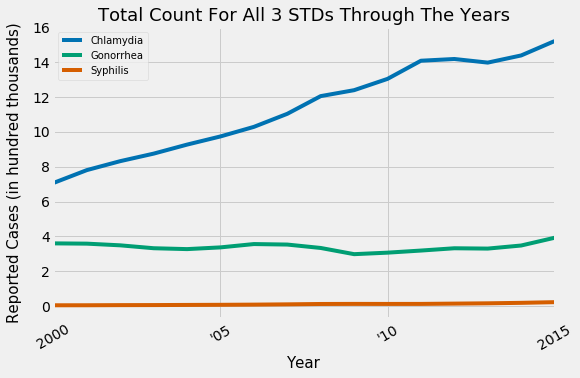

In [265]:

plt.style.use('seaborn-colorblind')
# plots the data accompanied with respective labels
STD_year_count.plot(x='Year', y=['Chlamydia_Count','Gonorrhea_Count','Primary_Secondary_Syphilis_Count'], 
                    label=['Chlamydia','Gonorrhea','Syphilis'],figsize=(8,5));
# title, x-label, y-label
plt.title('Total Count For All 3 STDs Through The Years', fontsize=18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Reported Cases (in hundred thousands)', fontsize=15, labelpad=10)

# sets legend
plt.legend(fontsize=10)

#sets tick marks on x-axis
plt.xticks((2000,2005,2010,2015),['2000','\'05','\'10','2015'],
           rotation=30
          );
# sets tick marks on y-axis
plt.yticks((0,200000,400000,600000,800000,1000000,1200000,1400000,1600000),
          ['0','2','4','6','8','10','12','14','16']);